##### Exploring the Breast Cancer Dataset

In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df_features = pd.DataFrame(data.data , columns = data.feature_names)
df_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df_target = pd.DataFrame(data.target , columns =['target'])
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [13]:
df_features.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

###  Exploratory data analysis (EDA)

 1- we start by plotting the distribution of some key features. This helps us see how the values for these features are spread out. 

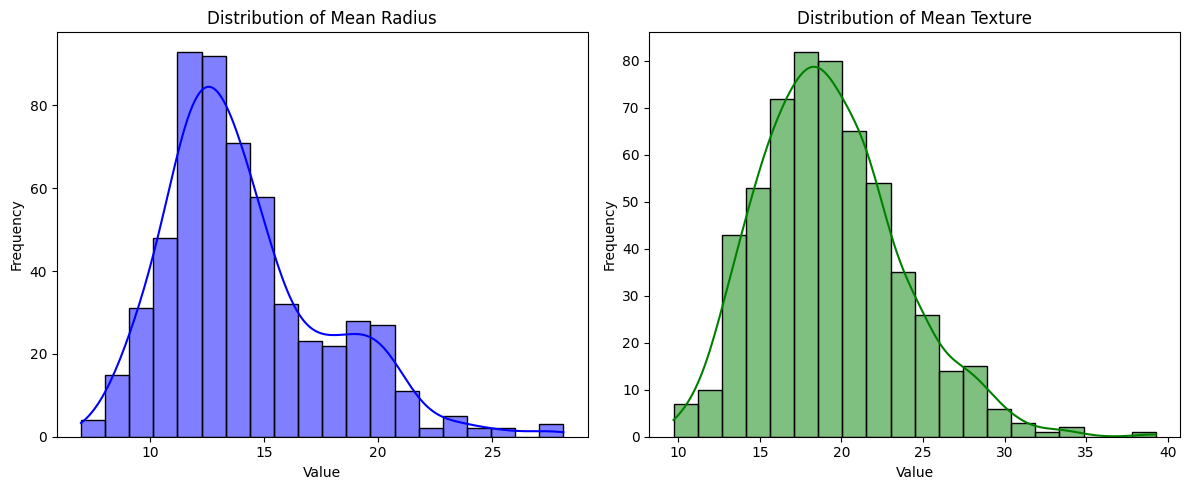

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.histplot(df_features['mean radius'], bins=20, color='blue', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Mean Radius')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

sns.histplot(df_features['mean texture'], bins=20, color='green', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Mean Texture')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


2- create a correlation heatmap. This will help us quickly identify any strong relationships between the different features. If two features are highly correlated, it might tell us something important or suggest that we can simplify our model.

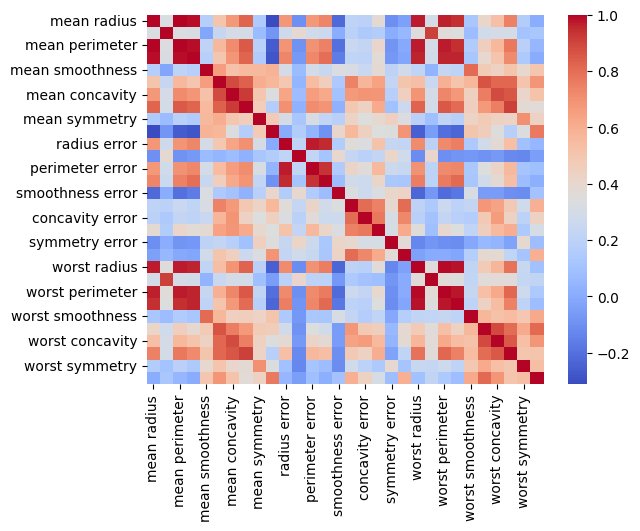

In [26]:
sns.heatmap(df_features.corr(), annot=False, cmap='coolwarm')
plt.show()

Here are some interpretations and how this information can be used:

- **Feature selection for machine learning models**: High positive or negative correlations (indicated by red or blue colours, respectively) suggest that two features have a linear relationship. When features are highly correlated with one another (multicollinearity), it can be redundant to use all of them in a machine learning model. This information can be used to select a subset of features that provides the most information, which can improve the model's performance and reduce overfitting.

- **Understanding data structure and relationships**: Correlations can reveal the underlying structure of the data. For example, a strong positive correlation between 'mean radius' and 'mean perimeter' might suggest that as the radius of a cell nucleus increases, so does its perimeter. This understanding can be vital in domains like biology or medicine, where understanding the relationships between different measurements can provide insights into the nature of cells or tumours being studied.

In [27]:
corr_matrix = df_features.corr().abs()
high_corr = corr_matrix[(corr_matrix > 0.9) & (corr_matrix < 1.0)]
high_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
mean texture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean perimeter,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
mean area,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
mean smoothness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean compactness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean concavity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean concave points,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155,NaN,NaN
mean symmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean fractal dimension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


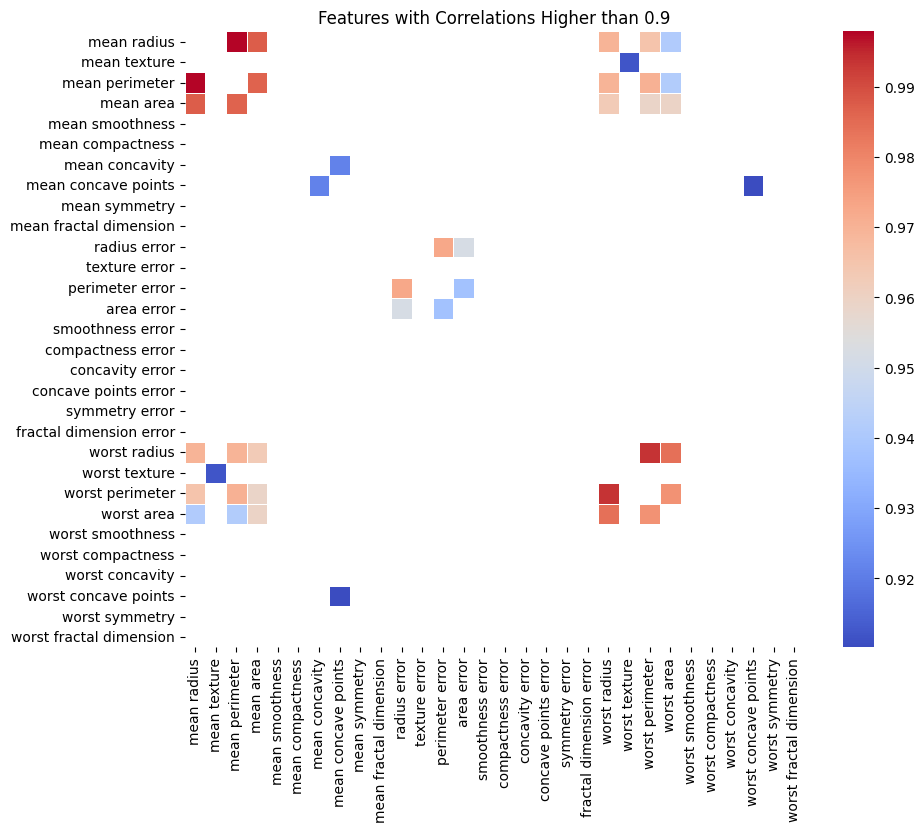

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Features with Correlations Higher than 0.9')
plt.show()


3-  we plot the distribution of the target variable using a countplot, showing the count of each class in the target variable.

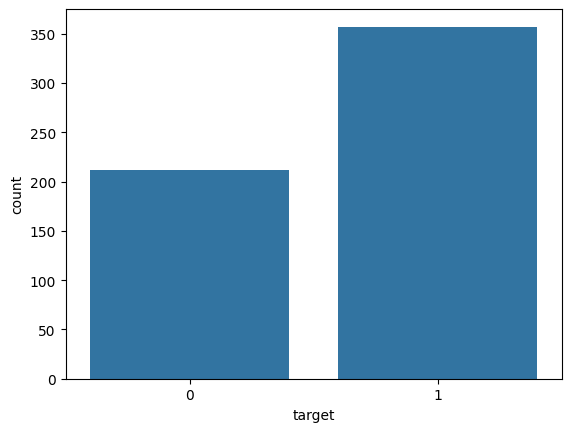

In [33]:
# Balance of target variable
sns.countplot(x='target', data=df_target)
plt.show()


'In our case, class '1' has a higher count than class '0', indicating that there are more instances of class '1' in the dataset. This could be an indication of an imbalance in class distribution or an implication that accuracy might not be a suitable performance metric as the model could simply predict the majority class for all instances and still achieve a deceptively high accuracy.'

### Train the model and prepare the data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    data.data, 
    data.target, 
    test_size=0.2, 
    random_state=42,
    stratify=data.target  # This ensures training and test sets have similar class proportions
)

# Step 2: Normalise the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Model evaluation and interpretation
we evaluate the performance of the logistic regression model built on the Breast Cancer dataset and interpret the outcomes. By leveraging the insights from our EDA and the data preparation steps, we aim to understand not just the performance metrics but also what they tell us about the model's predictive abilities in the context of medical diagnosis. 

1. **Model accuracy assessment:** First, we assess the model's accuracy on the test set, which will give us a baseline understanding of its performance. Given the class imbalance noted during the EDA, we acknowledge that accuracy alone may not be the best measure of performance. Nevertheless, it provides a quick indication of overall effectiveness.

2. **Advanced performance metrics:** A confusion matrix and classification report will provide a more nuanced view of the model's performance, including metrics like **precision**, **recall**, and **F1 score**. These are crucial in the medical field where the cost of false negatives could be significantly higher than false positives. 

3. **Coefficient analysis:** Finally, we interpret the coefficients of the model to identify which features most strongly predict the presence of malignancy in cell nuclei. This links back to our EDA findings, where we observed certain feature distributions and correlations. Understanding which features are most influential can also inform medical professionals regarding indicators of cancer severity.

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))
class_report = classification_report(y_test, model.predict(X_test_scaled))
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")



Model accuracy: 0.9824561403508771
Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



 ##### Understand which features in your dataset are most important for predicting malignancy

In [38]:
# Interpret model coefficients
coefficients = pd.DataFrame(model.coef_[0], index=data.feature_names, columns=['Coefficient'])
top_features = coefficients.abs().sort_values('Coefficient', ascending=False).head(3)
print("Top 3 features contributing to malignancy prediction:")
print(top_features)

Top 3 features contributing to malignancy prediction:
                      Coefficient
worst texture            1.255088
radius error             1.082965
worst concave points     0.953686


The *model's accuracy* is 98.25%, indicating that it **correctly predicts** the outcome for a high proportion of cases in the test set. 

The *confusion matrix* shows that it made **only one false positive** (predicting malignancy when it is not present) and **one false negative** (failing to predict malignancy when it is present), which are both very low. 

The *classification report* reinforces this, as the **precision**, **recall**, and **F1 score** for both classes are all high, demonstrating that the model is equally **good at predicting both classes**.

The *top three features* that contribute to predictions of malignancy are '`**worst texture**`', '`**radius error**`', and '`**worst concave points**`'. These features are the **most influential** in the logistic regression model, suggesting that they are key indicators of malignancy in breast cancer diagnosis. The high coefficients for these features mean that small changes in their values have a significant impact on the model's prediction.


**In conclusion**: By following these steps, we can ensure that the model evaluation is comprehensive and the results are interpreted with clinical relevance in mind.

### "Enhancing Logistic Regression Model Performance: Feature Selection and Hyperparameter Tuning"

Model improvement

It's now time to leverage our findings to improve our logistic regression model. Two potential strategies will be employed: 

1. **Feature selection:** Reflecting on the EDA, we consider the features that showed significant correlations and distinct distributions. We will identify a subset of features that are less correlated with each other but highly correlated with the target. This approach can reduce overfitting and improve model interpretability.

2. **Hyperparameter tuning:** Adjust the hyperparameters of the logistic regression model to optimise performance. The parameter '`C`', which controls the strength of regularisation, can be particularly influential. We'll use cross-validation to find the best value for '`C`' that balances the bias-variance trade-off.

#### Code for model improvement:

By following these steps, you will be able to not only improve your model's performance but also test the effect of each enhancement technique independently. This structured approach provides clarity on the impact of each method on model improvement and yields insights into which adjustments are most effective for this particular dataset and problem.

In [39]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Evaluating the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test_selected))
best_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_selected))
best_class_report = classification_report(y_test, best_model.predict(X_test_selected))

# Output the improved results
print(f"Improved Model Accuracy: {best_accuracy}")
print(f"Improved Confusion Matrix:\n{best_conf_matrix}\n")
print(f"Improved Classification Report:\n{best_class_report}")

Improved Model Accuracy: 0.9736842105263158
Improved Confusion Matrix:
[[40  2]
 [ 1 71]]

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

